# Data Acquistion

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import acquire as ac
import prepare as prp


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
telco = ac.telco_data()
telco.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check


In [3]:
# Data is pulled from SQL if a .csv file doesn't exist locally. Function will create a .csv file if one doesn't exist.

In [4]:
# 11 rows were removed since they did not have total charges.

# Data Preparation

In [5]:
telco = telco.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id'])
telco.head()  # The id # columns were dropped since they hold no value when it comes to determining churn.

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check


In [6]:
telco.dtypes  # Checking the types of data I am working with.

customer_id               object
gender                    object
senior_citizen             int64
partner                   object
dependents                object
tenure                     int64
phone_service             object
multiple_lines            object
online_security           object
online_backup             object
device_protection         object
tech_support              object
streaming_tv              object
streaming_movies          object
paperless_billing         object
monthly_charges          float64
total_charges            float64
churn                     object
contract_type             object
internet_service_type     object
payment_type              object
dtype: object

In [7]:
telco.isna().sum()  # Checking telco for null values. None present.

customer_id              0
gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
total_charges            0
churn                    0
contract_type            0
internet_service_type    0
payment_type             0
dtype: int64

In [8]:
# most of my data is string or object. I will have to convert this to work with it.

In [9]:
telco.nunique()  # Checking which columns have only 2 unique values so I can perform pd.getdummies on them.

customer_id              7032
gender                      2
senior_citizen              2
partner                     2
dependents                  2
tenure                     72
phone_service               2
multiple_lines              3
online_security             3
online_backup               3
device_protection           3
tech_support                3
streaming_tv                3
streaming_movies            3
paperless_billing           2
monthly_charges          1584
total_charges            6530
churn                       2
contract_type               3
internet_service_type       3
payment_type                4
dtype: int64

In [10]:
# ['gender', 'partner', 'dependents', 'phone_service', 'paperless_billing', 'churn']
# All of these features only have two possible unique values. This means we can drop a colum without losing information.
# Senior citizen is already in numeric format so we do not need to alter it.

In [11]:
# I am going to create a separate telco df just for model use. For exxploration I will use the normal df above.

telco_model = pd.get_dummies(telco, columns=['gender', 'partner', 'dependents', 'phone_service',
                                       'paperless_billing', 'churn'], drop_first=True)

In [12]:
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check


In [13]:
telco.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

In [14]:
rename = {'gender_Male':'male', 'partner_Yes':'partner', 'dependents_Yes':'dependents',
          'phone_service_Yes':'phone_service', 'paperless_billing_Yes':'paperless_billing', 'churn_Yes':'churn'}

# I will rename the columns to something a little more concise.

telco_model = telco_model.rename(columns=rename)
telco_model.head(3)

,customer_id,senior_citizen,tenure,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,...,total_charges,contract_type,internet_service_type,payment_type,male,partner,dependents,phone_service,paperless_billing,churn
0,0002-ORFBO,0,9,No,No,Yes,No,Yes,Yes,No,...,593.30,One year,DSL,Mailed check,0,1,1,1,1,0
1,0003-MKNFE,0,9,Yes,No,No,No,No,No,Yes,...,542.40,Month-to-month,DSL,Mailed check,1,0,0,1,0,0
2,0004-TLHLJ,0,4,No,No,No,Yes,No,No,No,...,280.85,Month-to-month,Fiber optic,Electronic check,1,0,0,1,1,1


In [15]:
# For now this is enough preparation for the exploration phase.

# Exploration

In [16]:
# In this step we are going to just explore the data in whatever way we see fit in order to gain a better understanding of our data.

In [17]:
# I have created a little list up here that I will be coming back to, in order to annotate my findings.

Important Features:

* Monthly charges

* Tenure

* Internet service type (Fiber optic has much higher churn rate)

* Partner

* Dependents

* Senior citizen

* Contract type (month-to-month customers churn way more than any other type of customer)

Not Important Features:

* Gender

* Phone service

In [18]:
# For this portion of the project we will be performing some stats tests. I will determine our confidence interval here.

In [19]:
alpha = 0.05

In [20]:
def eval_p(p_value):
    if p_value < alpha:
        print(f'There is a signifcant result. P-value was {p_value}.')
    else:
        print(f'There is no signifcant result. P-value was {round(p_value,2)}.')

In [21]:
# First lets just plot a few graphs to see what we can find. We are going to plot a few features against 'churn' since churn
# is out target variable

In [22]:
# First I will check for differences in gender. If men or women churn at different rates.

Does gender affect the churn rate in any way?

<Axes: xlabel='gender', ylabel='count'>

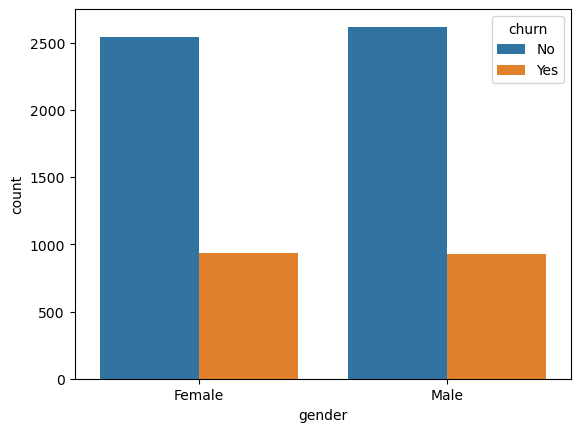

In [23]:
sns.countplot(data=telco, x='gender', hue='churn')

In [24]:
# From this graph it is pretty clear that gender has little to no influence on churn. I will perform some stats tests to be sure.

In [25]:
gender_ct = pd.crosstab(telco.gender, telco.churn)
gender_ct

churn,No,Yes
gender,,
Female,2544,939
Male,2619,930


In [26]:
chi2, p, degf, expected = stats.chi2_contingency(gender_ct)
eval_p(p)

There is no signifcant result. P-value was 0.49.


We can see that gender does not seem to play any role in churn.

In [27]:
# Next I will check monthly charges and tenure.

Does tenure have any effect on churn rate?

<Axes: xlabel='tenure', ylabel='Count'>

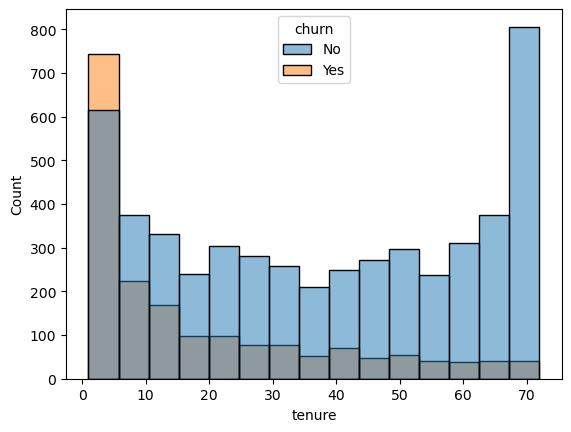

In [28]:
sns.histplot(data=telco, x='tenure', hue='churn')

In [29]:
telco_tenure = telco  # first I will create a second copy of telco to modify
telco_tenure['tenure_bin'] = pd.cut(telco.tenure,2,labels=['low tenure','high tenure'])  # I bin tenure into either high or low.
ct_tenure = pd.crosstab(telco_tenure.tenure_bin,telco.churn)  # perform crosstab to see how many of each case there is
ct_tenure

churn,No,Yes
tenure_bin,,
low tenure,2520,1511
high tenure,2643,358


In [30]:
chi2, p, degf, expected = stats.chi2_contingency(ct_tenure)
eval_p(p)

There is a signifcant result. P-value was 6.1980638492128095e-127.


Tenure seems to have a correlation with churn. Customers with lower tenure churn at a higher rate than those with lower tenures.

In [31]:
# From this histogram, we can see that customers with lower tenures churn at a much higher rate than those with higher tenures.

<Axes: xlabel='monthly_charges', ylabel='Count'>

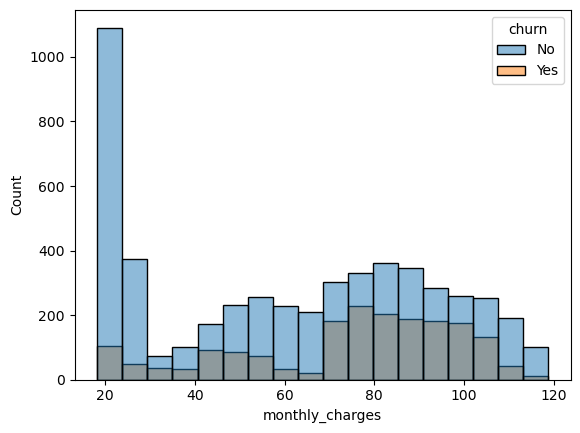

In [32]:
sns.histplot(data=telco, x='monthly_charges', hue='churn')

In [33]:
# From this histogram we see that there is a higher churn rate as monthly charges go up. 

<Axes: xlabel='tenure', ylabel='monthly_charges'>

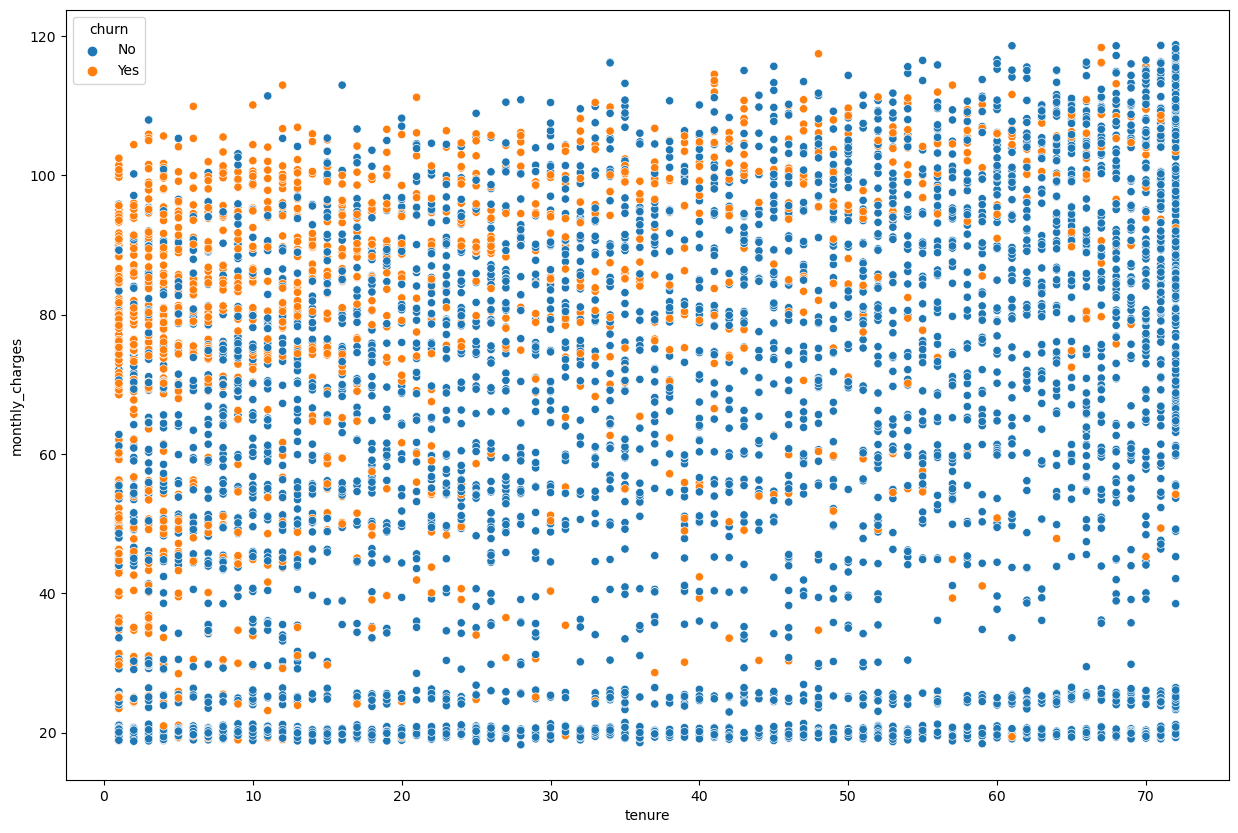

In [34]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=telco, x='tenure', y='monthly_charges', hue='churn')

In [35]:
#plt.figure(figsize=(15, 10))
#sns.scatterplot(data=mm_telco, x='tenure', y='monthly_charges', hue='churn')

In [36]:
# This scatter plot is showing the tenure vs monthly charges which doesn't show much of a pattern but when we add hue
# we can see that there is a higher concentration of churn with customers who have lower tenures and higher monthly charges.

Does internet service type have any effect on churn?

In [37]:
# Next I will explore internet service types to see if there is any kind of relationship between churn and service type

<Axes: xlabel='internet_service_type', ylabel='count'>

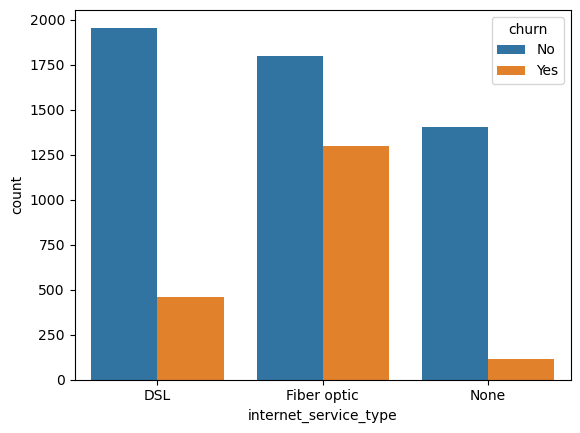

In [38]:
sns.countplot(data=telco, x='internet_service_type', hue='churn')

In [39]:
# Fiber optic seems to have a disproportionaly high churn rate compared to 'None' and 'DSL'

In [40]:
ct_net = pd.crosstab(telco.internet_service_type, telco.churn)
ct_net

churn,No,Yes
internet_service_type,,
DSL,1957,459
Fiber optic,1799,1297
None,1407,113


In [41]:
chi2, p, degf, expected = stats.chi2_contingency(ct_net)
eval_p(p)

There is a signifcant result. P-value was 5.831198962237274e-159.


In [42]:
expected

array([[1773.86348123,  642.13651877],
       [2273.12969283,  822.87030717],
       [1116.00682594,  403.99317406]])

There is a correlation between internet service type and churn. Customers with fiber optic seem to churn at a higher 
rate than those with no internet or DSL

In [43]:
# Lets plot a few more features and see if any of them show any sort of pattern

<Axes: xlabel='partner', ylabel='count'>

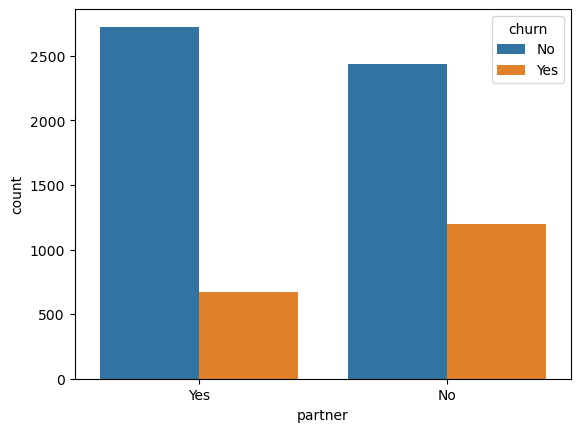

In [44]:
sns.countplot(data=telco, x='partner', hue='churn')

In [45]:
# Individuals without partners churn at higher rates than those with partners.

<Axes: xlabel='dependents', ylabel='count'>

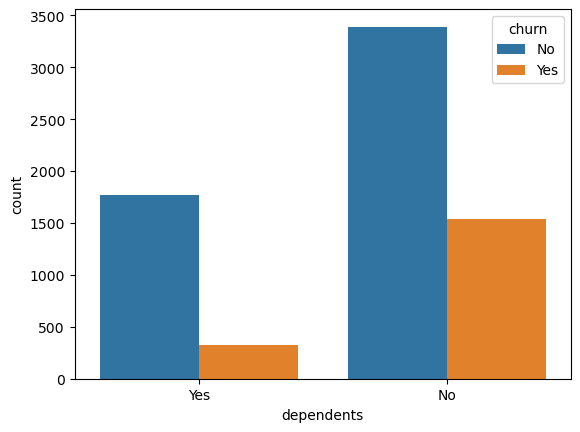

In [46]:
sns.countplot(data=telco, x='dependents', hue='churn')

In [47]:
# Individuals without dependents churn at higher rates than those with dependents.

<Axes: xlabel='senior_citizen', ylabel='count'>

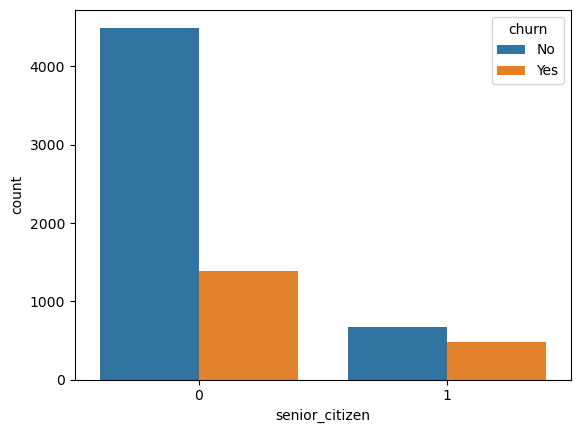

In [48]:
sns.countplot(data=telco, x='senior_citizen', hue='churn')

In [49]:
# Senior citizens churn at higher rates than non senior citizens

<Axes: xlabel='phone_service', ylabel='count'>

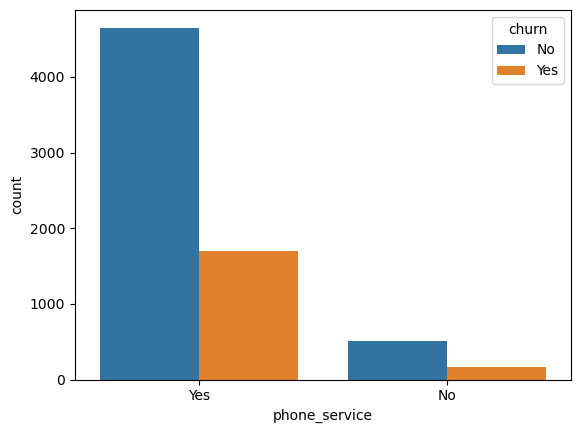

In [50]:
sns.countplot(data=telco, x='phone_service', hue='churn')

In [51]:
# This is hard to tell but it doesnt look like there is a significant difference in churn of customers with and without phone service

Does contract type have an influence on churn?

<Axes: xlabel='contract_type', ylabel='count'>

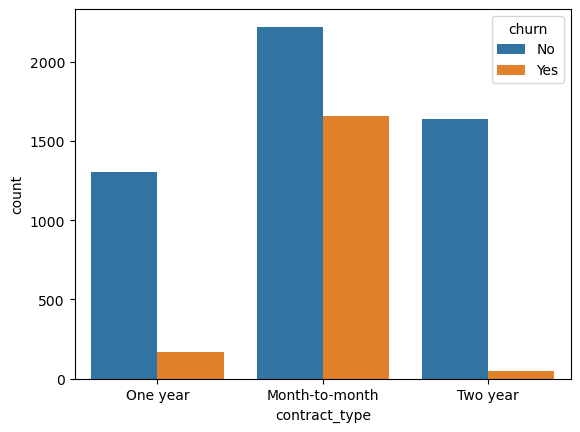

In [52]:
sns.countplot(data=telco, x='contract_type', hue='churn')

In [53]:
# Contract type seems to have the strongest correlation with churn so far. People who are on a month-to-month contract churn significantly 
# more often than any other contract type.

In [54]:
contract_ct = pd.crosstab(telco.contract_type, telco.churn)
contract_ct

churn,No,Yes
contract_type,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


In [55]:
chi2, p, degf, expected = stats.chi2_contingency(ct_net)
eval_p(p)

There is a signifcant result. P-value was 5.831198962237274e-159.


In [56]:
mm_telco = telco[telco.contract_type == 'Month-to-month']
nmm_telco = telco[telco.contract_type != 'Month-to-month']

# I created two smaller data frames separating month to month from the rest of customers to graph them separately

<Axes: xlabel='monthly_charges', ylabel='Count'>

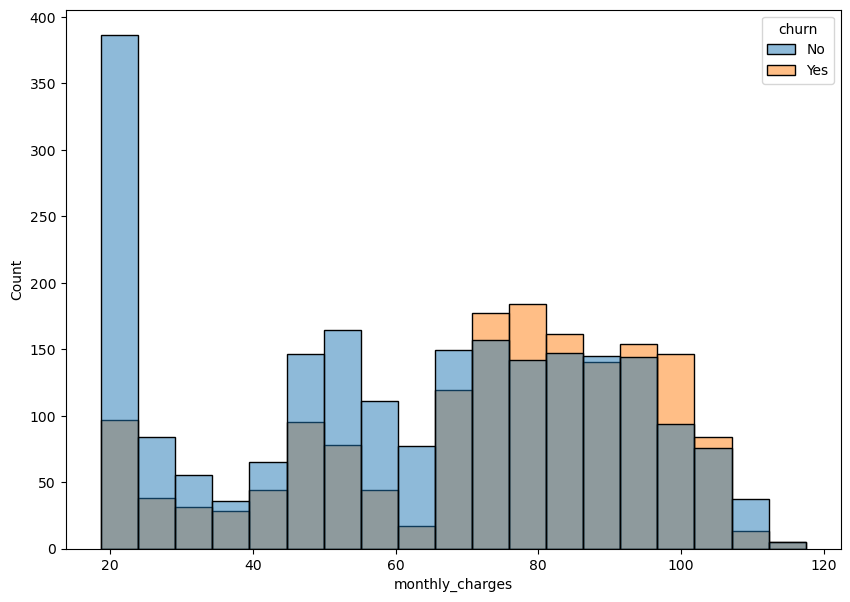

In [57]:
plt.figure(figsize=(10, 7))
sns.histplot(data=mm_telco, x='monthly_charges', hue='churn')

In [58]:
# This is a grapth of ONLY MONTH-TO-MONTH customers. Below is a chart of every other customer. We can see there is a
# massive difference between them. It looks like when charges go above $60 the churn rate increases drastically.

<Axes: xlabel='monthly_charges', ylabel='Count'>

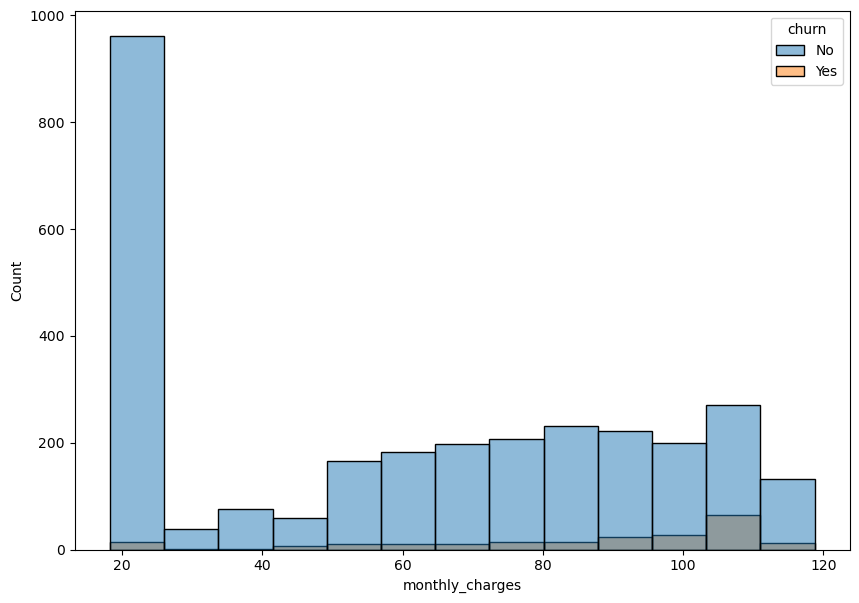

In [59]:
plt.figure(figsize=(10, 7))
sns.histplot(data=nmm_telco, x='monthly_charges', hue='churn')

In [60]:
# Customers in year+ contracts do not churn often.

Contract type has a massive effect on churn. Customers with month-to-month internet churn much more often than those under longer contracts.

In [61]:
# I will continue to plot the rest of the features to see if i can find any patterns.

<Axes: xlabel='streaming_tv', ylabel='count'>

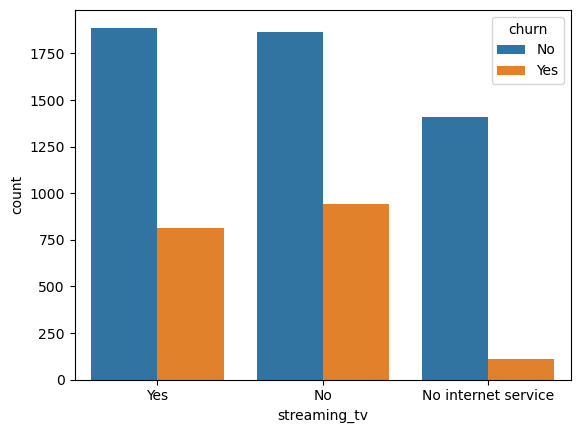

In [62]:
sns.countplot(data=telco, x='streaming_tv', hue='churn')

<Axes: xlabel='online_backup', ylabel='count'>

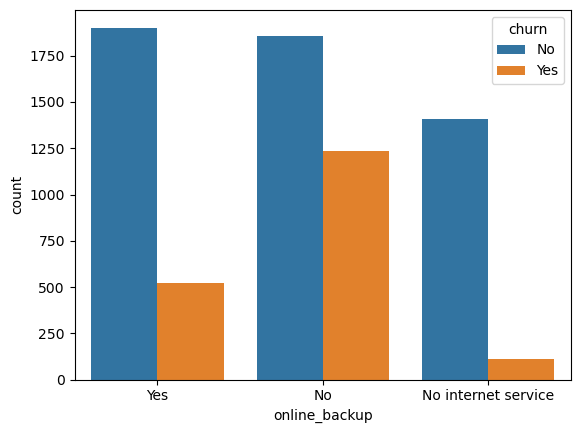

In [63]:
sns.countplot(data=telco, x='online_backup', hue='churn')

<Axes: xlabel='streaming_movies', ylabel='count'>

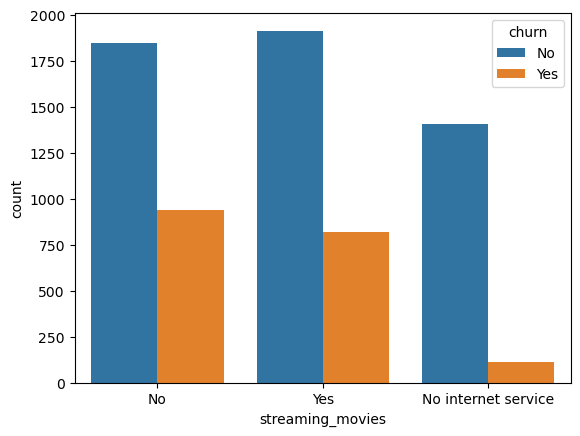

In [64]:
sns.countplot(data=telco, x='streaming_movies', hue='churn')

<Axes: xlabel='tech_support', ylabel='count'>

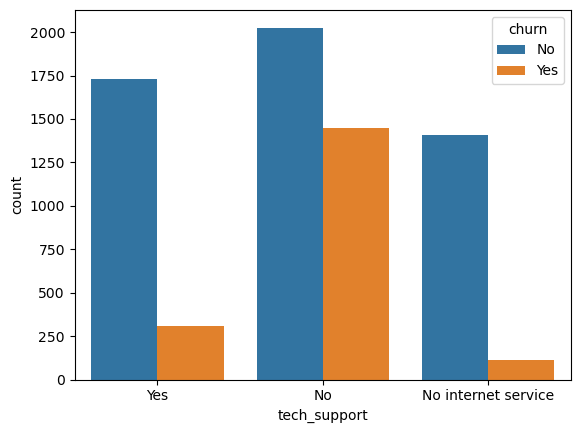

In [65]:
sns.countplot(data=telco, x='tech_support', hue='churn')

<Axes: xlabel='online_security', ylabel='count'>

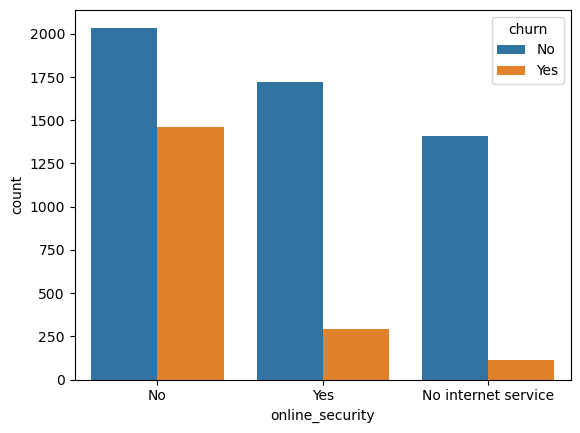

In [66]:
sns.countplot(data=telco, x='online_security', hue='churn')

<Axes: xlabel='device_protection', ylabel='count'>

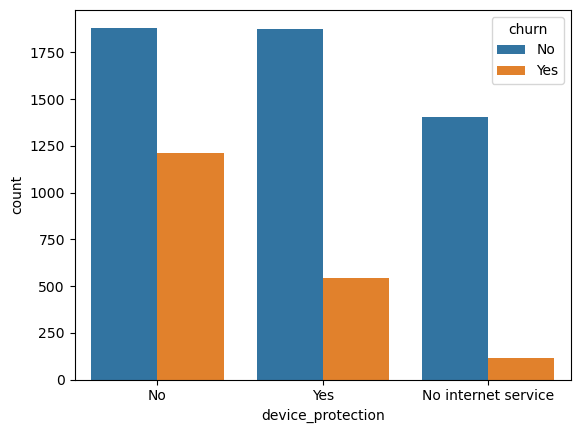

In [67]:
sns.countplot(data=telco, x='device_protection', hue='churn')

<Axes: xlabel='online_backup', ylabel='count'>

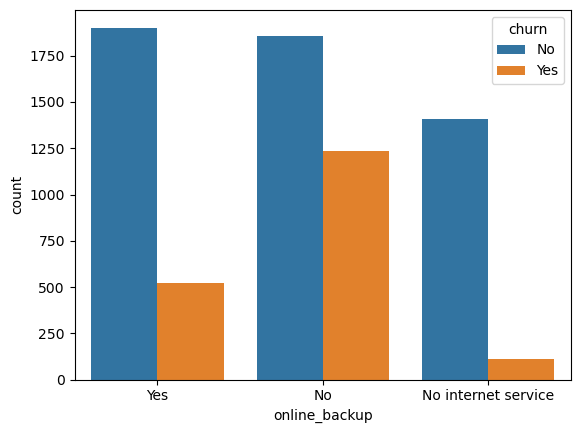

In [68]:
sns.countplot(data=telco, x='online_backup', hue='churn')

<Axes: xlabel='multiple_lines', ylabel='count'>

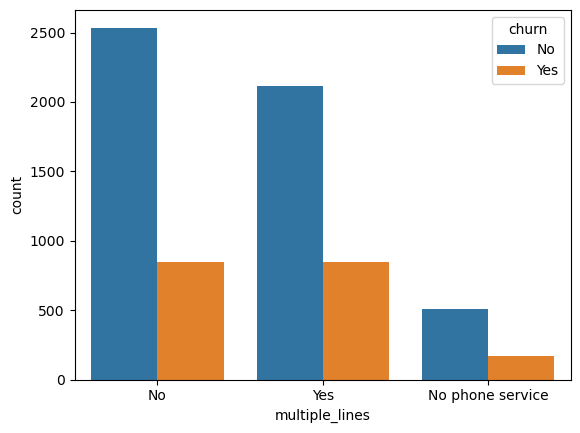

In [69]:
sns.countplot(data=telco, x='multiple_lines', hue='churn')

<Axes: xlabel='payment_type', ylabel='count'>

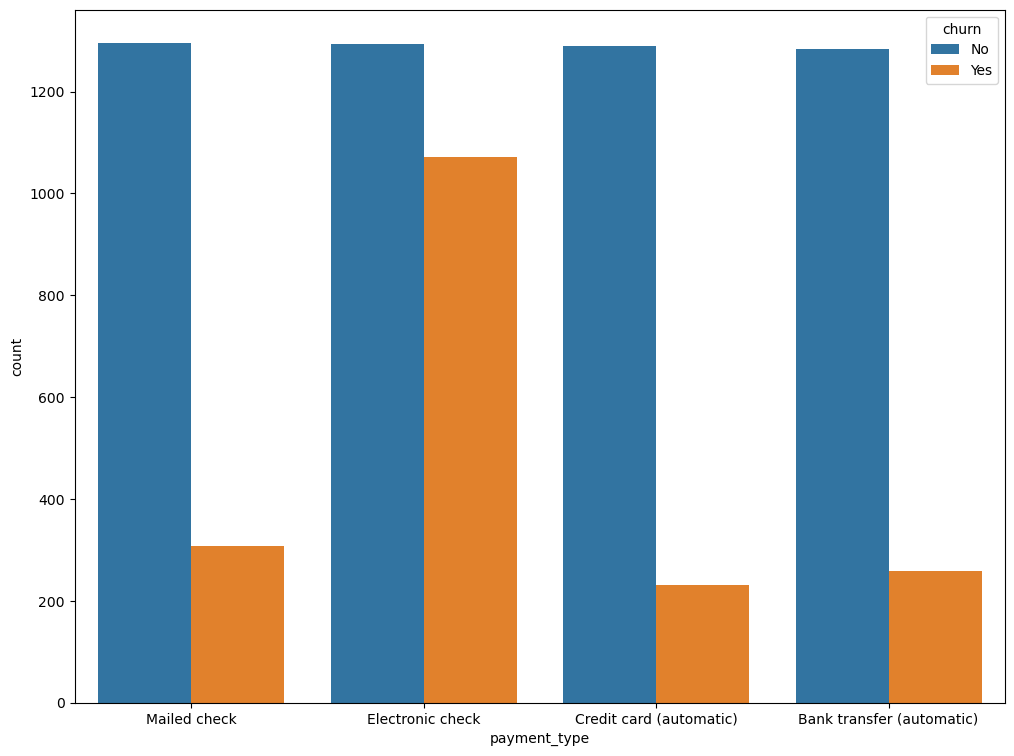

In [70]:
plt.figure(figsize=(12, 9))
sns.countplot(data=telco, x='payment_type', hue='churn')

<Axes: xlabel='paperless_billing', ylabel='count'>

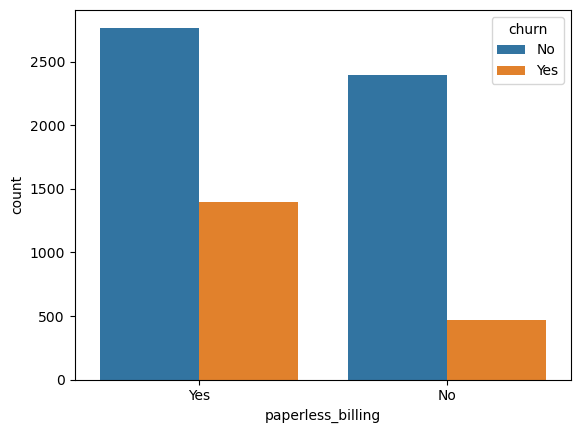

In [71]:
sns.countplot(data=telco, x='paperless_billing', hue='churn')

# Modeling

In [72]:
seed = 100  # setting seed number

In [73]:
telco = telco_model  # reassigning telco to the version above where changes were made
telco = telco.drop(columns=['streaming_tv', 'streaming_movies']) # dropping these two columns that seemed to have little impact on churn
telco = pd.get_dummies(telco, columns=['multiple_lines', 'online_security', 'online_backup', 'device_protection',
                                       'tech_support', 'contract_type', 'internet_service_type', 'payment_type'])
telco.head()  # creating dummies for the rest of the columns

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,male,partner,dependents,phone_service,paperless_billing,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,0,9,65.6,593.30,0,1,1,1,1,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,0,9,59.9,542.40,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,0,4,73.9,280.85,1,0,0,1,1,...,1,0,0,0,1,0,0,0,1,0
3,0011-IGKFF,1,13,98.0,1237.85,1,1,0,1,1,...,1,0,0,0,1,0,0,0,1,0
4,0013-EXCHZ,1,3,83.9,267.40,0,1,0,1,1,...,1,0,0,0,1,0,0,0,0,1


In [74]:
telco.columns

Index(['customer_id', 'senior_citizen', 'tenure', 'monthly_charges',
       'total_charges', 'male', 'partner', 'dependents', 'phone_service',
       'paperless_billing', 'churn', 'multiple_lines_No',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No',
       'tech_support_No internet service', 'tech_support_Yes',
       'contract_type_Month-to-month', 'contract_type_One year',
       'contract_type_Two year', 'internet_service_type_DSL',
       'internet_service_type_Fiber optic', 'internet_service_type_None',
       'payment_type_Bank transfer (automatic)',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check'],

In [75]:
to_delete = []

for col in telco.columns:
    if 'No internet service' in col or 'No phone service' in col:
        to_delete.append(col)

to_delete  # i use a for loop to identify all columns that are names 'No ...' since they are redundant and there is already a column for that

['multiple_lines_No phone service',
 'online_security_No internet service',
 'online_backup_No internet service',
 'device_protection_No internet service',
 'tech_support_No internet service']

In [76]:
telco = telco.drop(columns=to_delete)  # drop the columns

new_names = {'contract_type_Month-to-month':'monthly_contract','contract_type_One year':'year_contract',
             'contract_type_Two year':'two_year_contract', 'internet_service_type_DSL':'DSL',
             'internet_service_type_Fiber optic':'Fiber_optic','internet_service_type_None':'No_internet',
             'payment_type_Bank transfer (automatic)':'bank_transfer_pay','payment_type_Credit card (automatic)':'credit_card_pay',
             'payment_type_Electronic check':'e-check_pay', 'payment_type_Mailed check':'mailed_check'}

telco = telco.rename(columns=new_names)  # renaming some of the other columns to something more concise and clear

In [77]:
telco.columns

Index(['customer_id', 'senior_citizen', 'tenure', 'monthly_charges',
       'total_charges', 'male', 'partner', 'dependents', 'phone_service',
       'paperless_billing', 'churn', 'multiple_lines_No', 'multiple_lines_Yes',
       'online_security_No', 'online_security_Yes', 'online_backup_No',
       'online_backup_Yes', 'device_protection_No', 'device_protection_Yes',
       'tech_support_No', 'tech_support_Yes', 'monthly_contract',
       'year_contract', 'two_year_contract', 'DSL', 'Fiber_optic',
       'No_internet', 'bank_transfer_pay', 'credit_card_pay', 'e-check_pay',
       'mailed_check'],
      dtype='object')

In [78]:
telco.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,male,partner,dependents,phone_service,paperless_billing,...,monthly_contract,year_contract,two_year_contract,DSL,Fiber_optic,No_internet,bank_transfer_pay,credit_card_pay,e-check_pay,mailed_check
0,0002-ORFBO,0,9,65.6,593.30,0,1,1,1,1,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,0,9,59.9,542.40,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,0,4,73.9,280.85,1,0,0,1,1,...,1,0,0,0,1,0,0,0,1,0
3,0011-IGKFF,1,13,98.0,1237.85,1,1,0,1,1,...,1,0,0,0,1,0,0,0,1,0
4,0013-EXCHZ,1,3,83.9,267.40,0,1,0,1,1,...,1,0,0,0,1,0,0,0,0,1


In [79]:
telco = telco.drop(columns=['multiple_lines_No', 'online_security_No', 'online_backup_No','device_protection_No', 'tech_support_No'])
# I am going to delete these columns since only one is needed since there is only yes/no for this data

In [80]:
telco.columns

Index(['customer_id', 'senior_citizen', 'tenure', 'monthly_charges',
       'total_charges', 'male', 'partner', 'dependents', 'phone_service',
       'paperless_billing', 'churn', 'multiple_lines_Yes',
       'online_security_Yes', 'online_backup_Yes', 'device_protection_Yes',
       'tech_support_Yes', 'monthly_contract', 'year_contract',
       'two_year_contract', 'DSL', 'Fiber_optic', 'No_internet',
       'bank_transfer_pay', 'credit_card_pay', 'e-check_pay', 'mailed_check'],
      dtype='object')

In [81]:
to_delete = []

for col in telco.columns:
    if 'Yes' in col:
        to_delete.append(col)

to_delete  # finding cells with 'Yes' to rename them in order to make the columns a bit cleaner

['multiple_lines_Yes',
 'online_security_Yes',
 'online_backup_Yes',
 'device_protection_Yes',
 'tech_support_Yes']

In [82]:
names = {'multiple_lines_Yes':'multiple_lines',
         'online_security_Yes':'online_security',
         'online_backup_Yes':'online_backup',
         'device_protection_Yes':'device_protection',
         'tech_support_Yes':'tech_support'}

telco = telco.rename(columns=names)

In [83]:
for col in telco.columns:
    print(f' {col}   {telco[col].nunique()}       {telco[col].dtype}')

 customer_id   7032       object
 senior_citizen   2       int64
 tenure   72       int64
 monthly_charges   1584       float64
 total_charges   6530       float64
 male   2       uint8
 partner   2       uint8
 dependents   2       uint8
 phone_service   2       uint8
 paperless_billing   2       uint8
 churn   2       uint8
 multiple_lines   2       uint8
 online_security   2       uint8
 online_backup   2       uint8
 device_protection   2       uint8
 tech_support   2       uint8
 monthly_contract   2       uint8
 year_contract   2       uint8
 two_year_contract   2       uint8
 DSL   2       uint8
 Fiber_optic   2       uint8
 No_internet   2       uint8
 bank_transfer_pay   2       uint8
 credit_card_pay   2       uint8
 e-check_pay   2       uint8
 mailed_check   2       uint8


In [84]:
telco.dtypes

customer_id           object
senior_citizen         int64
tenure                 int64
monthly_charges      float64
total_charges        float64
male                   uint8
partner                uint8
dependents             uint8
phone_service          uint8
paperless_billing      uint8
churn                  uint8
multiple_lines         uint8
online_security        uint8
online_backup          uint8
device_protection      uint8
tech_support           uint8
monthly_contract       uint8
year_contract          uint8
two_year_contract      uint8
DSL                    uint8
Fiber_optic            uint8
No_internet            uint8
bank_transfer_pay      uint8
credit_card_pay        uint8
e-check_pay            uint8
mailed_check           uint8
dtype: object

In [85]:
telco.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,male,partner,dependents,phone_service,paperless_billing,...,monthly_contract,year_contract,two_year_contract,DSL,Fiber_optic,No_internet,bank_transfer_pay,credit_card_pay,e-check_pay,mailed_check
0,0002-ORFBO,0,9,65.6,593.30,0,1,1,1,1,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,0,9,59.9,542.40,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,0,4,73.9,280.85,1,0,0,1,1,...,1,0,0,0,1,0,0,0,1,0
3,0011-IGKFF,1,13,98.0,1237.85,1,1,0,1,1,...,1,0,0,0,1,0,0,0,1,0
4,0013-EXCHZ,1,3,83.9,267.40,0,1,0,1,1,...,1,0,0,0,1,0,0,0,0,1


## Decision Tree

In [86]:
telco = ac.telco_data()  # retrieve data
telco = prp.prep_telco(telco)  # prep data using function that does everything done above
telco.head(3)

train, val, test = prp.train_val_test(telco,'churn',seed=100)  # split data into 3 sets


train, customer_id_train = prp.split_x_y(train,'customer_id')   # remove customer id from sample now that is has been split
val, customer_id_val = prp.split_x_y(val,'customer_id')
test, customer_id_test = prp.split_x_y(test,'customer_id')

x_train, y_train = prp.split_x_y(train,'churn')  # split data to remove the target variable churn
x_val, y_val = prp.split_x_y(val,'churn')
x_test, y_test = prp.split_x_y(test,'churn')

train.shape, val.shape, test.shape  

((4922, 25), (1055, 25), (1055, 25))

In [87]:
train.head(2)

,senior_citizen,tenure,monthly_charges,total_charges,male,partner,dependents,phone_service,paperless_billing,churn,...,monthly_contract,year_contract,two_year_contract,DSL,Fiber_optic,No_internet,bank_transfer_pay,credit_card_pay,e-check_pay,mailed_check
3421,0,13,73.75,956.65,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
110,0,10,85.25,855.30,1,1,0,1,1,1,...,1,0,0,0,1,0,0,0,1,0


In [88]:
train.churn.value_counts()

0    3614
1    1308
Name: churn, dtype: int64

In [89]:
prp.baseline(train,'churn',1)  # our braindead baseline model has decent accuracy but will never guess the positive group ever.

Baseline accuracy is: 73.43%.
Baseline recall is: 0.0%.
Baseline precision is: 0.0%.



In [90]:
# I will create a for loop to check multiple model depths at once

model_num = []
depth = []
accuracy_train = []
accuracy_val = []
samples = []

for i in range(2,21,2):
    for n in range(1,11):
        clf = DecisionTreeClassifier(max_depth=n, min_samples_split=i, random_state=seed)
        clf.fit(x_train, y_train)
        
        model_num.append(f'Model {int((i/2)*10 + n)}')
        depth.append(n)
        samples.append(i)
        accuracy_train.append(clf.score(x_train, y_train))
        accuracy_val.append(clf.score(x_val, y_val))

        
        
models = {'model_num':model_num,
          'depth':depth,
          'samples':samples,
          'accuracy_train':accuracy_train,
          'accuracy_val':accuracy_val}

models = pd.DataFrame(models)
models[models.accuracy_val > .788]  # all of my models with the highest accuracy on validate had around 6-7 depth. 
                                    # This seems to be the optimal depth

,model_num,depth,samples,accuracy_train,accuracy_val
6,Model 17,7,2,0.821211,0.788626
15,Model 26,6,4,0.813084,0.788626
25,Model 36,6,6,0.813084,0.788626
35,Model 46,6,8,0.813084,0.788626
45,Model 56,6,10,0.812881,0.788626
46,Model 57,7,10,0.819789,0.788626
55,Model 66,6,12,0.812678,0.788626
56,Model 67,7,12,0.819586,0.788626
65,Model 76,6,14,0.812678,0.788626
66,Model 77,7,14,0.819586,0.788626


In [91]:
clf = DecisionTreeClassifier(max_depth=7, min_samples_split=10, random_state=seed)
clf.fit(x_train, y_train)
prp.importance(x_train, clf)  # using our best model, lets check what features the model deems most important.

,cols,importance
14,monthly_contract,0.427106
1,tenure,0.152454
18,Fiber_optic,0.131344
3,total_charges,0.089971
2,monthly_charges,0.080392
19,No_internet,0.020050
10,online_security,0.019087
22,e-check_pay,0.014885
9,multiple_lines,0.010650
16,two_year_contract,0.009015


In [92]:
least_important = list(prp.importance(x_train, clf).cols.tail(20))  # create a list of the least important features
# telco = telco.drop(columns=least_important)

In [93]:
# telco = telco.drop(columns=least_important)


model_num = []
depth = []
accuracy_train = []
accuracy_val = []
samples = []
max_feat = []
min_split = []
gen = 1

for m in range(4,12,1):
    for s in range(2,21,2):
        for i in range(2,21,2):
            for n in range(5,10):
                clf = DecisionTreeClassifier(max_depth=n, min_samples_split=s, min_samples_leaf=i, max_features=m, random_state=seed)
                clf.fit(x_train, y_train)

                model_num.append(f'Model {gen}')
                depth.append(n)
                min_split.append(s)
                samples.append(i)
                max_feat.append(m)
                accuracy_train.append(clf.score(x_train, y_train))
                accuracy_val.append(clf.score(x_val, y_val))
                gen += 1



models = {'model_num':model_num,
          'depth':depth,
          'samples':samples,
          'min_splits':min_split,
          'max_features':max_feat,
          'accuracy_train':accuracy_train,
          'accuracy_val':accuracy_val}

models = pd.DataFrame(models).sort_values(by='accuracy_val', ascending=False).head(30)
models

,model_num,depth,samples,min_splits,max_features,accuracy_train,accuracy_val
1714,Model 1715,9,6,10,7,0.826493,0.809479
1764,Model 1765,9,6,12,7,0.826493,0.809479
1514,Model 1515,9,6,2,7,0.826493,0.809479
1564,Model 1565,9,6,4,7,0.826493,0.809479
1664,Model 1665,9,6,8,7,0.826493,0.809479
1614,Model 1615,9,6,6,7,0.826493,0.809479
2152,Model 2153,7,2,8,8,0.813287,0.801896
2202,Model 2203,7,2,10,8,0.812678,0.801896
3257,Model 3258,7,4,12,10,0.814709,0.800948
2364,Model 2365,9,6,16,8,0.831166,0.800948


In [94]:
# After creating 1000s of models, the highest validate accurary I could achieve was around 80% which when tested it scored 78%

In [95]:
clf = DecisionTreeClassifier(max_depth=9, min_samples_split=10, min_samples_leaf=6, max_features=7, random_state=seed)
clf.fit(x_train, y_train)
clf.score(x_train, y_train), clf.score(x_val,y_val), clf.score(x_test,y_test)

(0.8264932954083706, 0.809478672985782, 0.7819905213270142)

## Random Forest

In [96]:
telco = ac.telco_data()  # retrieve data
telco = prp.prep_telco(telco)  # prep data using function that does everything done above
telco.head(3)

train, val, test = prp.train_val_test(telco,'churn',seed=100)  # split data into 3 sets


train, customer_id_train = prp.split_x_y(train,'customer_id')   # remove customer id from sample now that is has been split
val, customer_id_val = prp.split_x_y(val,'customer_id')
test, customer_id_test = prp.split_x_y(test,'customer_id')

x_train, y_train = prp.split_x_y(train,'churn')  # split data to remove the target variable churn
x_val, y_val = prp.split_x_y(val,'churn')
x_test, y_test = prp.split_x_y(test,'churn')

train.shape, val.shape, test.shape 

((4922, 25), (1055, 25), (1055, 25))

In [97]:
prp.baseline(train,'churn',1)

Baseline accuracy is: 73.43%.
Baseline recall is: 0.0%.
Baseline precision is: 0.0%.



In [98]:
# With random forest, models take significantly longer to create and train so I will have to limit the number of models created

In [121]:
model_num = []
depth = []
accuracy_train = []
accuracy_val = []
samples = []
max_feat = []
min_split = []
trees = []
gen = 1

for t in range(50,105,25):
    for f in range(7,10,1):
        for s in range(7,11,1):
            for i in range(2,9,2):
                for n in range(8,11):
                    rf1 = RandomForestClassifier(n_estimators=t, max_depth=n, min_samples_leaf=i, 
                                                 min_samples_split=s, max_features=f, random_state=seed)
                    rf1.fit(x_train, y_train)
                    model_num.append(f'Model {gen}')
                    depth.append(n)
                    min_split.append(s)
                    samples.append(i)
                    max_feat.append(f)
                    trees.append(t)
                    accuracy_train.append(rf1.score(x_train, y_train))
                    accuracy_val.append(rf1.score(x_val, y_val))
                    gen += 1



models = {'model_num':model_num,
          'depth':depth,
          'samples':samples,
          'min_splits':min_split,
          'max_features':max_feat,
          'trees':trees,
          'accuracy_train':accuracy_train,
          'accuracy_val':accuracy_val}

models = pd.DataFrame(models).sort_values(by='accuracy_val', ascending=False).head(5)
models

,model_num,depth,samples,min_splits,max_features,trees,accuracy_train,accuracy_val
2,Model 3,10,2,7,7,50,0.886792,0.817073
220,Model 221,9,4,9,8,75,0.869956,0.817073
146,Model 147,10,2,7,7,75,0.886212,0.814363
60,Model 61,8,2,8,8,50,0.853411,0.814363
75,Model 76,8,4,9,8,50,0.850508,0.813008


In [100]:
models.head(10)

,model_num,depth,samples,min_splits,max_features,trees,accuracy_train,accuracy_val
79,Model 80,9,6,9,8,50,0.847217,0.811374
91,Model 92,9,6,10,8,50,0.847217,0.811374
67,Model 68,9,6,8,8,50,0.847217,0.811374
55,Model 56,9,6,7,8,50,0.847217,0.811374
199,Model 200,9,6,7,8,75,0.848232,0.810427
211,Model 212,9,6,8,8,75,0.848232,0.810427
223,Model 224,9,6,9,8,75,0.848232,0.810427
235,Model 236,9,6,10,8,75,0.848232,0.810427
143,Model 144,10,8,10,9,50,0.850467,0.808531
179,Model 180,10,8,9,7,75,0.845794,0.808531


In [101]:
rf1 = RandomForestClassifier(n_estimators=50, max_depth=9, min_samples_leaf=6,
                                                 min_samples_split=9, max_features=8, random_state=seed)
rf1.fit(x_train, y_train)
rf1.score(x_train, y_train), rf1.score(x_val, y_val), rf1.score(x_test, y_test)

(0.8472165786265745, 0.8113744075829384, 0.795260663507109)

In [102]:
# The model above is the model that performed the best out of all.

## KNN

In [103]:
telco = ac.telco_data()  # retrieve data
telco = prp.prep_telco(telco)  # prep data using function that does everything done above
telco.head(3)

train, val, test = prp.train_val_test(telco,'churn',seed=100)  # split data into 3 sets


train, customer_id_train = prp.split_x_y(train,'customer_id')   # remove customer id from sample now that is has been split
val, customer_id_val = prp.split_x_y(val,'customer_id')
test, customer_id_test = prp.split_x_y(test,'customer_id')

x_train, y_train = prp.split_x_y(train,'churn')  # split data to remove the target variable churn
x_val, y_val = prp.split_x_y(val,'churn')
x_test, y_test = prp.split_x_y(test,'churn')

train.shape, val.shape, test.shape 

((4922, 25), (1055, 25), (1055, 25))

In [104]:
train.head()

,senior_citizen,tenure,monthly_charges,total_charges,male,partner,dependents,phone_service,paperless_billing,churn,...,monthly_contract,year_contract,two_year_contract,DSL,Fiber_optic,No_internet,bank_transfer_pay,credit_card_pay,e-check_pay,mailed_check
3421,0,13,73.75,956.65,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
110,0,10,85.25,855.30,1,1,0,1,1,1,...,1,0,0,0,1,0,0,0,1,0
4358,0,71,53.95,3888.65,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
6856,0,49,67.40,3306.85,0,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0
1938,0,50,19.40,1023.95,0,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0


In [105]:
telco.columns

Index(['customer_id', 'senior_citizen', 'tenure', 'monthly_charges',
       'total_charges', 'male', 'partner', 'dependents', 'phone_service',
       'paperless_billing', 'churn', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support',
       'monthly_contract', 'year_contract', 'two_year_contract', 'DSL',
       'Fiber_optic', 'No_internet', 'bank_transfer_pay', 'credit_card_pay',
       'e-check_pay', 'mailed_check'],
      dtype='object')

In [106]:
mms = MinMaxScaler()
for col in ['tenure', 'monthly_charges', 'total_charges']:
    x_train[[col]] = mms.fit_transform(x_train[[col]])
    x_val[[col]] = mms.transform(x_val[[col]])
    x_test[[col]] = mms.transform(x_test[[col]])
    
x_train.head()

clf = DecisionTreeClassifier(max_depth=9, min_samples_split=10, min_samples_leaf=6, max_features=7, random_state=seed)
clf.fit(x_train, y_train)
clf.score(x_train, y_train), clf.score(x_val,y_val), clf.score(x_test,y_test)
least_important = list(prp.importance(x_train, clf).cols.tail(15))  # create a list of the least important features
x_train = x_train.drop(columns=least_important)
x_val = x_val.drop(columns=least_important)
x_test = x_test.drop(columns=least_important)

model_num = []
neighbors = []
leaf = []
weight = []
accuracy_train = []
accuracy_val = []
gen = 1

for w in ['uniform']:
    for l in range(30,60,3):
        for n in range(1,40):
            knn = KNeighborsClassifier(n_neighbors=n, weights=w, leaf_size=l)
            knn.fit(x_train, y_train)

            model_num.append(f'Model {gen}')
            neighbors.append(n)
            leaf.append(l)
            weight.append(w)
            accuracy_train.append(knn.score(x_train, y_train))
            accuracy_val.append(knn.score(x_val, y_val))
            gen += 1



models = {'model_num':model_num,
          'neighbors':neighbors,
          'leaf':leaf,
          'weights':weight,
          'accuracy_train':accuracy_train,
          'accuracy_val':accuracy_val}

models = pd.DataFrame(models).sort_values(by='accuracy_val', ascending=False).head(30)
models

,model_num,neighbors,leaf,weights,accuracy_train,accuracy_val
134,Model 135,18,39,uniform,0.817148,0.809479
212,Model 213,18,45,uniform,0.817148,0.809479
329,Model 330,18,54,uniform,0.817148,0.809479
17,Model 18,18,30,uniform,0.816944,0.809479
173,Model 174,18,42,uniform,0.817148,0.809479
56,Model 57,18,33,uniform,0.816944,0.809479
251,Model 252,18,48,uniform,0.817148,0.809479
290,Model 291,18,51,uniform,0.817148,0.809479
368,Model 369,18,57,uniform,0.817148,0.809479
95,Model 96,18,36,uniform,0.816944,0.809479


In [107]:
x_train.head()

,tenure,monthly_charges,total_charges,paperless_billing,multiple_lines,monthly_contract,Fiber_optic,No_internet,e-check_pay
3421,0.169014,0.552239,0.108217,1,0,1,1,0,0
110,0.126761,0.666667,0.096521,1,1,1,1,0,1
4358,0.985915,0.355224,0.446552,0,0,0,0,0,0
6856,0.676056,0.489055,0.379416,0,0,0,0,0,0
1938,0.690141,0.011443,0.115983,0,0,0,0,1,0


In [108]:
knn = KNeighborsClassifier(n_neighbors=18, weights='uniform', leaf_size=39)
knn.fit(x_train, y_train)
knn.score(x_train, y_train)

0.8171475010158472

In [109]:
knn.score(x_val, y_val)

0.809478672985782

In [110]:
knn.score(x_test, y_test)

0.7990521327014218

## Logistic Regression

In [111]:
telco = ac.telco_data()  # retrieve data
telco = prp.prep_telco(telco)  # prep data using function that does everything done above
telco.head(3)

train, val, test = prp.train_val_test(telco,'churn',seed=100)  # split data into 3 sets


train, customer_id_train = prp.split_x_y(train,'customer_id')   # remove customer id from sample now that is has been split
val, customer_id_val = prp.split_x_y(val,'customer_id')
test, customer_id_test = prp.split_x_y(test,'customer_id')

x_train, y_train = prp.split_x_y(train,'churn')  # split data to remove the target variable churn
x_val, y_val = prp.split_x_y(val,'churn')
x_test, y_test = prp.split_x_y(test,'churn')

train.shape, val.shape, test.shape 

((4922, 25), (1055, 25), (1055, 25))

In [112]:
logreg = LogisticRegression(random_state = seed, max_iter = 400)

logreg.fit(x_train, y_train)

logreg.score(x_train, y_train), logreg.score(x_val, y_val)

(0.8004876066639578, 0.7971563981042654)

In [122]:
placeholder = train.copy()

def check_model(columns):
    new_df = pd.DataFrame()
    new_df['churn'] = placeholder['churn']

    for n in columns:
        new_df[n] = checker[n]
    new_df
    
    train, val, test = prp.train_val_test(new_df,'churn')
    x_train, y_train = prp.split_x_y(train,'churn')
    x_val, y_val = prp.split_x_y(val,'churn')
    
    logreg = LogisticRegression(random_state = seed, max_iter = 400)
    
    logreg.fit(x_train, y_train)

    return logreg.score(x_train, y_train), logreg.score(x_val, y_val)

In [114]:
new = []

In [115]:
clf = DecisionTreeClassifier(max_depth=7, min_samples_split=10, random_state=seed)
clf.fit(x_train, y_train)
cols = list(prp.importance(x_train, clf).cols)
cols

['monthly_contract',
 'tenure',
 'Fiber_optic',
 'total_charges',
 'monthly_charges',
 'No_internet',
 'online_security',
 'e-check_pay',
 'multiple_lines',
 'two_year_contract',
 'phone_service',
 'tech_support',
 'paperless_billing',
 'senior_citizen',
 'dependents',
 'year_contract',
 'mailed_check',
 'credit_card_pay',
 'bank_transfer_pay',
 'device_protection',
 'male',
 'DSL',
 'online_backup',
 'partner']

In [116]:
cols[:2]

['monthly_contract', 'tenure']

In [117]:
number = 1
for i in range(1,25):
    columns = cols[:i]
    print(f'{number}  {check_model(columns)}')
    number += 1

1  (0.7343976777939042, 0.7344173441734417)
2  (0.7544267053701016, 0.7669376693766937)
3  (0.788388969521045, 0.7804878048780488)
4  (0.788388969521045, 0.7845528455284553)
5  (0.7892597968069667, 0.7859078590785907)
6  (0.7901306240928883, 0.7818428184281843)
7  (0.7901306240928883, 0.7859078590785907)
8  (0.7962264150943397, 0.8021680216802168)
9  (0.7970972423802613, 0.8089430894308943)
10  (0.797677793904209, 0.8062330623306233)
11  (0.8043541364296082, 0.8116531165311653)
12  (0.8005805515239478, 0.8089430894308943)
13  (0.8026124818577649, 0.8102981029810298)
14  (0.8040638606676342, 0.8089430894308943)
15  (0.8011611030478955, 0.8184281842818428)
16  (0.8031930333817127, 0.8157181571815718)
17  (0.8026124818577649, 0.8143631436314364)
18  (0.8058055152394775, 0.8116531165311653)
19  (0.8034833091436865, 0.8130081300813008)
20  (0.8026124818577649, 0.8143631436314364)
21  (0.8031930333817127, 0.8102981029810298)
22  (0.8040638606676342, 0.8170731707317073)
23  (0.802322206095791

In [118]:
cols[:15]

['monthly_contract',
 'tenure',
 'Fiber_optic',
 'total_charges',
 'monthly_charges',
 'No_internet',
 'online_security',
 'e-check_pay',
 'multiple_lines',
 'two_year_contract',
 'phone_service',
 'tech_support',
 'paperless_billing',
 'senior_citizen',
 'dependents']

In [119]:
    new_df = pd.DataFrame()
    new_df['churn'] = checker['churn']

    for n in cols[:15]:
        new_df[n] = checker[n]
    new_df
    
    train, val, test = prp.train_val_test(new_df,'churn')
    x_train, y_train = prp.split_x_y(train,'churn')
    x_val, y_val = prp.split_x_y(val,'churn')
    x_test, y_test = prp.split_x_y(test,'churn')
    
    logreg = LogisticRegression(random_state = seed, max_iter = 400)
    
    logreg.fit(x_train, y_train)

    logreg.score(x_train, y_train), logreg.score(x_val, y_val)

(0.8011611030478955, 0.8184281842818428)

In [120]:
 logreg.score(x_train, y_train), logreg.score(x_val, y_val), logreg.score(x_test, y_test)

(0.8011611030478955, 0.8184281842818428, 0.803788903924222)